In [136]:
# !pip uninstall scikit-learn imbalanced-learn matplotlib pycaret -y
# !pip install scikit-learn
# !pip install imbalanced-learn
# !pip install matplotlib
# !pip install pycaret -q
# !pip install autoviz -q

> # 1. Import Lib

In [137]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

> ## 2. Load data and make dataframe

In [138]:
df = pd.read_csv("../input/dataset/IT_customer_churn.csv")
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6933,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
6604,Male,0,Yes,Yes,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.50,90.05,No
5414,Male,0,No,No,64,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),105.65,6903.1,Yes
419,Female,1,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.30,75.3,Yes
5299,Female,1,Yes,No,28,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),101.30,2812.2,Yes


In [139]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [140]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [141]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

> # 3. Do Some EDA

In [142]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [143]:
df.isnull().sum().sum()

0

In [144]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [145]:
df1 = df[df["TotalCharges"]!=" "]

In [146]:
df.shape

(7043, 20)

In [147]:
df1.shape

(7032, 20)

In [148]:
pd.to_numeric(df1.TotalCharges,errors='coerce').isnull().sum()

0

In [149]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [150]:
type(df1)

pandas.core.frame.DataFrame

In [151]:
df1.shape

(7032, 20)

In [152]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

> # 4. Let's do some  Visualization

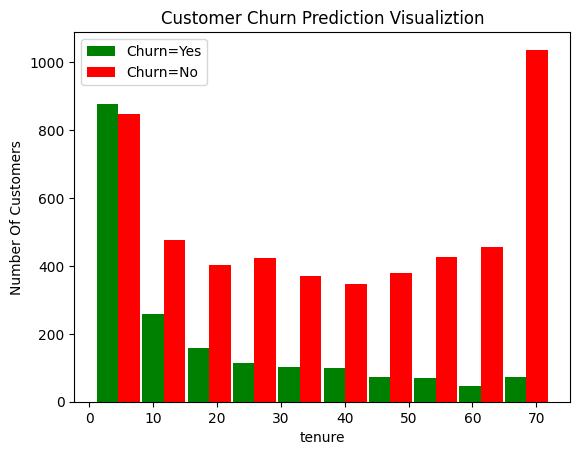

In [153]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

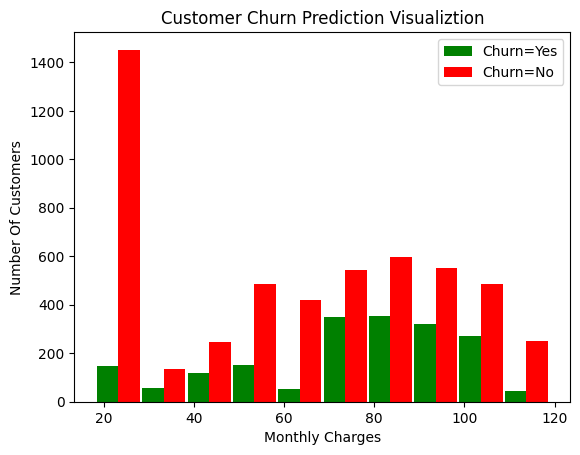

In [154]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

> # 5. Data Preprocessing

In [155]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [156]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [157]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

In [158]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [159]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [160]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


> # ****One hot encoding for categorical columns****> 

In [161]:
df1['gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [162]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [163]:
df1 = pd.get_dummies(df1,['Contract','PaymentMethod','InternetService'])

In [164]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_DSL,Contract_Fiber optic,Contract_No,PaymentMethod_Month-to-month,PaymentMethod_One year,PaymentMethod_Two year,InternetService_Bank transfer (automatic),InternetService_Credit card (automatic),InternetService_Electronic check,InternetService_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


> # **scalling**

In [165]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_DSL', 'Contract_Fiber optic', 'Contract_No',
       'PaymentMethod_Month-to-month', 'PaymentMethod_One year',
       'PaymentMethod_Two year', 'InternetService_Bank transfer (automatic)',
       'InternetService_Credit card (automatic)',
       'InternetService_Electronic check', 'InternetService_Mailed check'],
      dtype='object')

In [166]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [167]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

> #  **Train test split**

In [168]:
X = df1.drop('Churn',axis='columns')
y = df1.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [169]:
y_train.value_counts()

Churn
0.0    4130
1.0    1495
Name: count, dtype: int64

In [170]:
y.value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [171]:
y_test.value_counts()

Churn
0.0    1033
1.0     374
Name: count, dtype: int64

In [172]:
X_train.shape

(5625, 26)

In [173]:
X_test.shape

(1407, 26)

In [174]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_DSL,Contract_Fiber optic,Contract_No,PaymentMethod_Month-to-month,PaymentMethod_One year,PaymentMethod_Two year,InternetService_Bank transfer (automatic),InternetService_Credit card (automatic),InternetService_Electronic check,InternetService_Mailed check
684,0,0,0,0,0.000000,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
2446,0,0,0,0,0.239437,1,1,0,1,0,...,False,True,False,True,False,False,False,True,False,False
1680,1,0,1,1,0.774648,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
2220,1,0,1,0,1.000000,1,0,1,1,0,...,True,False,False,False,False,True,True,False,False,False
2842,0,0,0,0,0.042254,0,0,1,0,1,...,True,False,False,True,False,False,False,False,False,True
5131,0,0,1,0,0.605634,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
4372,1,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
4687,1,0,1,0,0.295775,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
2385,0,0,0,1,0.028169,0,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
6773,1,1,1,0,0.507042,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [175]:
len(X_train.columns)

26


> # 6&7 .Train the model**Use logistic regression classifier**


In [176]:
def log_reg(X_train, y_train, X_test, y_test, weights):
    if weights==-1:
        model = LogisticRegression()
    else:
        model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]})

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds", y_pred[:5], "\n")

    cl_rep = classification_report(y_test,y_pred)
    print(cl_rep)

* **weight means you are giving more importance to a particular class**.

In [177]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.8031272210376688 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1033
         1.0       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [178]:
weights = [1, 1.5] # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7931769722814499 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      1033
         1.0       0.60      0.68      0.64       374

    accuracy                           0.79      1407
   macro avg       0.74      0.76      0.75      1407
weighted avg       0.80      0.79      0.80      1407



In [179]:
weights = [1, 2] # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7739872068230277 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      1033
         1.0       0.56      0.74      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.74      1407
weighted avg       0.80      0.77      0.78      1407



In [180]:
weights = [1, 1.25] # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7945984363894811 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1033
         1.0       0.62      0.60      0.61       374

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



* when we don't define class weights we get 0.66 precision and 0.54 recall.
* when we define class weights we get 0.50 precision and 0.79 recall.

> # "Imbalanced dataset"

> # >  Method1: Undersampling

In [181]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [182]:
count_class_0

5163

In [183]:
count_class_1

1869

In [184]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [185]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [186]:
# Number of classes in training Data
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [187]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7566844919786097 

preds [0 1 0 1 0] 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       374
           1       0.75      0.77      0.76       374

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



> # **Method2: Oversampling**

In [188]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [189]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [190]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [191]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7729912875121007 

preds [0 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1033
           1       0.75      0.81      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



> # **Method3: SMOTE**

In [192]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [193]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [195]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [196]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7986447241045499 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1033
           1       0.78      0.83      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



> # **Pycaret**

# **Improve f1-score**

In [202]:
from pycaret.classification import *
import pycaret

In [206]:
setup(data=df1, target='Churn', session_id=123,remove_outliers=True,fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 27)"
4,Transformed data shape,"(8884, 27)"
5,Transformed train set shape,"(6774, 27)"
6,Transformed test set shape,"(2110, 27)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [200]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [207]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7883,0.8375,0.5994,0.6033,0.6009,0.4569,0.4572,4.6290
gbc,Gradient Boosting Classifier,0.7865,0.8452,0.6805,0.5857,0.6292,0.4806,0.4835,0.6780
lightgbm,Light Gradient Boosting Machine,0.7859,0.8334,0.5963,0.5979,0.5968,0.4511,0.4513,28.5610
rf,Random Forest Classifier,0.7802,0.8207,0.5879,0.5869,0.5868,0.4372,0.4376,0.5710
xgboost,Extreme Gradient Boosting,0.7763,0.8215,0.5810,0.5800,0.5799,0.4276,0.4280,1.3050
et,Extra Trees Classifier,0.7739,0.7967,0.5344,0.5811,0.5561,0.4049,0.4060,0.5160
ada,Ada Boost Classifier,0.7718,0.8468,0.7455,0.5530,0.6344,0.4740,0.4857,0.3750
lr,Logistic Regression,0.7617,0.8443,0.7539,0.5372,0.6271,0.4592,0.4738,0.8460
svm,SVM - Linear Kernel,0.7607,0.8352,0.7233,0.5410,0.6160,0.4484,0.4612,0.1720
lda,Linear Discriminant Analysis,0.7546,0.8410,0.7585,0.5267,0.6215,0.4486,0.4651,0.1590


**choose ada boost classifier**

In [208]:
model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7606,0.8171,0.7252,0.5367,0.6169,0.4484,0.4592
1,0.7647,0.8319,0.7328,0.5424,0.6234,0.4578,0.4687
2,0.8049,0.8923,0.8385,0.5924,0.6943,0.5571,0.5753
3,0.7785,0.8617,0.7231,0.5629,0.6330,0.4778,0.4855
4,0.7500,0.8218,0.7634,0.5208,0.6192,0.4428,0.4608
5,0.7520,0.8449,0.7252,0.5249,0.6090,0.4342,0.4463
6,0.7724,0.8418,0.8015,0.5497,0.6522,0.4916,0.5109
7,0.7825,0.8579,0.7405,0.5706,0.6445,0.4916,0.5003
8,0.7825,0.8403,0.6947,0.5759,0.6298,0.4777,0.4819


In [209]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [211]:
predictions = predict_model(model, data=df1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7702,0.8500,0.7469,0.5498,0.6334,0.4716,0.4834


> # **Imporve Adaboost**

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [221]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=123)

In [256]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

def parameter_finder_classification(model, parameters):
    
    start = time.time()
    
    # Perform GridSearchCV
    grid = GridSearchCV(model, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1), 
                        n_jobs = -1)
    
    grid_fit = grid.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    # Metrics calculation
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification report
    class_report = classification_report(y_test, y_pred)
    
    # Model name
    model_name = str(model).split('(')[0]
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model are: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"Accuracy on the training set: {train_accuracy:0.2%} for {model_name} model.")
    print(f"Accuracy on the testing set: {test_accuracy:0.2%} for {model_name} model.")
    print(f"Precision: {precision:0.2f} for {model_name} model.")
    print(f"Recall: {recall:0.2f} for {model_name} model.")
    print(f"F1 Score: {f1:0.2f} for {model_name} model.")
    print("--" * 10)
    print("Classification Report:")
    print(class_report)
    print("--" * 10)
    print(f"Runtime of the program: {end - start:0.2f} seconds.")
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Plot Performance Metrics (Accuracy, Precision, Recall, F1-Score)
    metrics = [train_accuracy, test_accuracy, precision, recall, f1]
    metric_names = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']
    
    plt.figure(figsize=(8, 5))
    plt.barh(metric_names, metrics, color='skyblue')
    plt.title(f'Performance Metrics for {model_name}')
    plt.xlim(0, 1)
    plt.xlabel('Score')
    plt.show()
    
    return train_accuracy, test_accuracy, precision, recall, f1



The best parameters for AdaBoostClassifier model are: {'algorithm': 'SAMME.R', 'estimator__class_weight': 'balanced', 'estimator__criterion': 'gini', 'estimator__max_depth': 3, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 100}
--------------------
Accuracy on the training set: 82.18% for AdaBoostClassifier model.
Accuracy on the testing set: 80.69% for AdaBoostClassifier model.
Precision: 0.81 for AdaBoostClassifier model.
Recall: 0.81 for AdaBoostClassifier model.
F1 Score: 0.81 for AdaBoostClassifier model.
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1031
           1       0.79      0.83      0.81      1035

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

-----------------

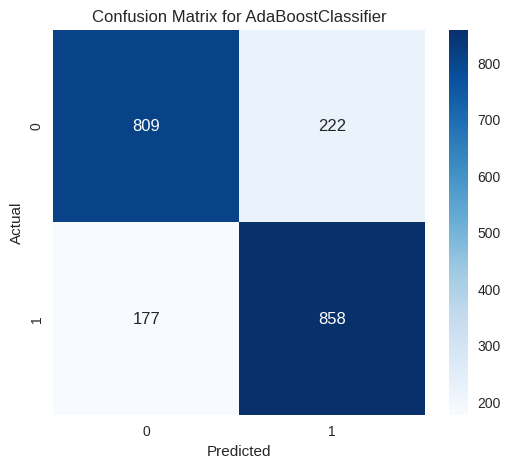

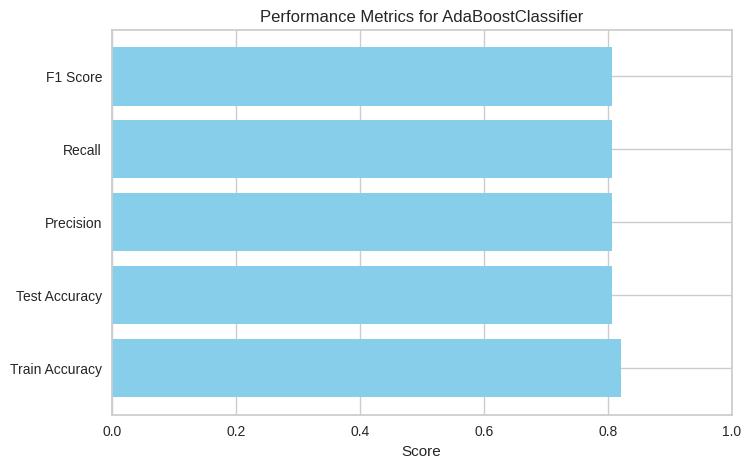

(0.8217917675544795,
 0.8068731848983544,
 0.8074404195032487,
 0.8068731848983544,
 0.8067733609135023)

In [257]:
# Define the decision tree with desired parameters
dt = DecisionTreeClassifier()

# Create the AdaBoost classifier with the base estimator
ada_model = AdaBoostClassifier(estimator=dt)
param_dist = {
    'n_estimators': [100],  # Increase the number of trees for better search
    'learning_rate': [0.1],  # Adding smaller values for the learning rate
    'algorithm': ['SAMME.R'],  # Different algorithms
    'estimator__max_depth': [3],  # Decision tree depths
    'estimator__min_samples_split': [2],  # Minimum samples required to split
    'estimator__min_samples_leaf': [1],  # Minimum samples required in a leaf
    'estimator__max_features': ['sqrt'],  # Number of features used
    'estimator__criterion': ['gini', 'entropy'],  # Splitting criteria
    'estimator__class_weight': ['balanced'],  # Class weight options
}
parameter_finder_classification(ada_model, param_dist)

The best parameters for AdaBoostClassifier model are: {'algorithm': 'SAMME.R', 'estimator__class_weight': 'balanced', 'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 150}
--------------------
Accuracy on the training set: 91.97% for AdaBoostClassifier model.
Accuracy on the testing set: 83.16% for AdaBoostClassifier model.
Precision: 0.83 for AdaBoostClassifier model.
Recall: 0.83 for AdaBoostClassifier model.
F1 Score: 0.83 for AdaBoostClassifier model.
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1031
           1       0.82      0.86      0.84      1035

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066

----------------

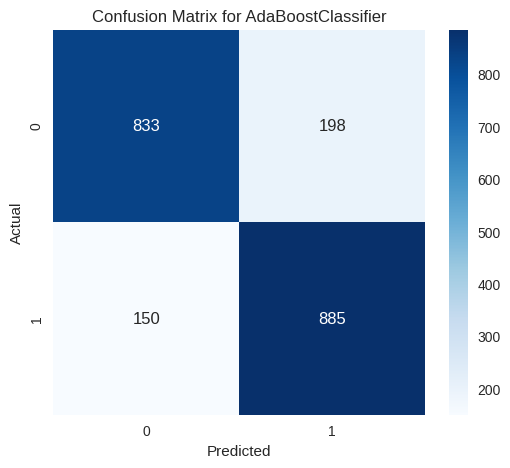

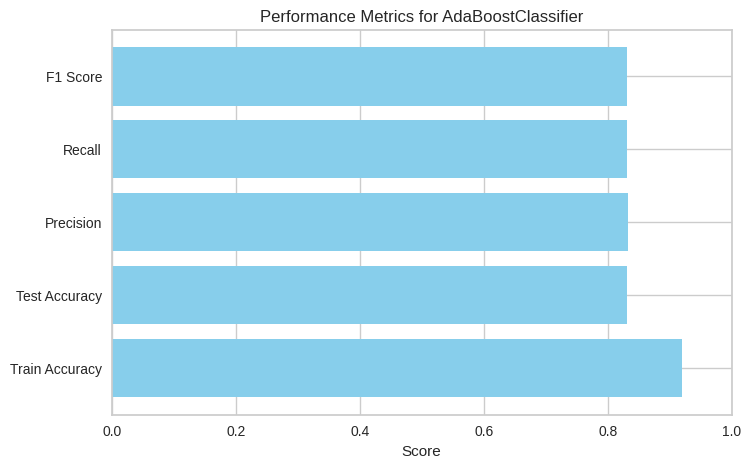

(0.9197336561743341,
 0.8315585672797676,
 0.8322609421507005,
 0.8315585672797676,
 0.8314600056024274)

In [258]:
# Define the decision tree with desired parameters
dt = DecisionTreeClassifier()

# Create the AdaBoost classifier with the base estimator
ada_model = AdaBoostClassifier(estimator=dt)
param_dist = {
    'n_estimators': [50, 100, 150],  # Increase the number of trees for better search
    'learning_rate': [0.01, 0.1, 0.5],  # Adding smaller values for the learning rate
    'algorithm': ['SAMME.R'],  # Different algorithms
    'estimator__max_depth': [5, 7],  # Decision tree depths
    'estimator__min_samples_split': [2, 5],  # Minimum samples required to split
    'estimator__min_samples_leaf': [1, 2],  # Minimum samples required in a leaf
    'estimator__max_features': ['sqrt'],  # Number of features used
    'estimator__criterion': ['gini', 'entropy'],  # Splitting criteria
    'estimator__class_weight': ['balanced'],  # Class weight options
}
parameter_finder_classification(ada_model, param_dist)

The best parameters for AdaBoostClassifier model are: {'algorithm': 'SAMME.R', 'estimator__class_weight': 'balanced', 'estimator__criterion': 'entropy', 'estimator__max_depth': 5, 'estimator__max_features': 0.5, 'estimator__min_samples_leaf': 5, 'estimator__min_samples_split': 10, 'learning_rate': 0.05, 'n_estimators': 100}
--------------------
Accuracy on the training set: 88.18% for AdaBoostClassifier model.
Accuracy on the testing set: 81.80% for AdaBoostClassifier model.
Precision: 0.82 for AdaBoostClassifier model.
Recall: 0.82 for AdaBoostClassifier model.
F1 Score: 0.82 for AdaBoostClassifier model.
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1031
           1       0.80      0.85      0.82      1035

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066

---------------

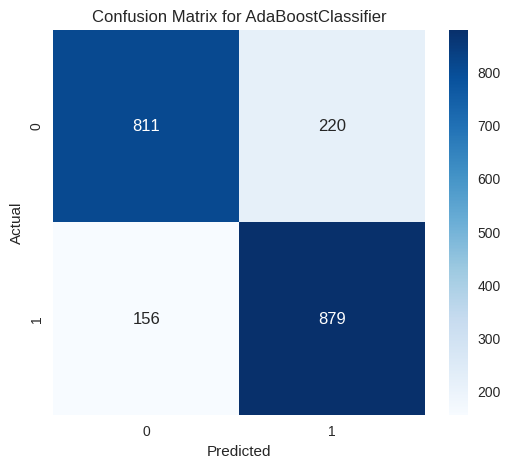

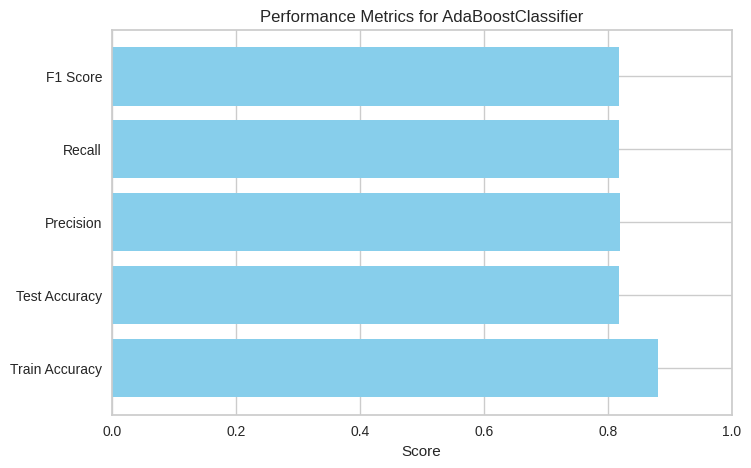

(0.8818401937046005,
 0.8180058083252663,
 0.8192095505016792,
 0.8180058083252663,
 0.817820046480439)

In [259]:
# Define the decision tree with desired parameters
dt = DecisionTreeClassifier()

# Create the AdaBoost classifier with the base estimator
ada_model = AdaBoostClassifier(estimator=dt)
param_dist = {
    'n_estimators': [50, 100],  # Decreased the number of trees
    'learning_rate': [0.01, 0.05],  # Reduced learning rate
    'algorithm': ['SAMME.R'], 
    'estimator__max_depth': [3, 5],  # Reduced max depth
    'estimator__min_samples_split': [10, 20],  # Increased min_samples_split
    'estimator__min_samples_leaf': [4, 5],  # Increased min_samples_leaf
    'estimator__max_features': [0.5, 0.7],  # Used fewer features for splitting
    'estimator__criterion': ['entropy'],
    'estimator__class_weight': ['balanced'],
}
parameter_finder_classification(ada_model, param_dist)

The best parameters for AdaBoostClassifier model are: {'algorithm': 'SAMME.R', 'estimator__class_weight': 'balanced', 'estimator__criterion': 'entropy', 'estimator__max_depth': 9, 'estimator__max_features': 'log2', 'learning_rate': 0.01, 'n_estimators': 500}
--------------------
Accuracy on the training set: 99.85% for AdaBoostClassifier model.
Accuracy on the testing set: 84.46% for AdaBoostClassifier model.
Precision: 0.84 for AdaBoostClassifier model.
Recall: 0.84 for AdaBoostClassifier model.
F1 Score: 0.84 for AdaBoostClassifier model.
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1031
           1       0.84      0.86      0.85      1035

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

--------------------
Runtime of the program: 35.74 seconds.


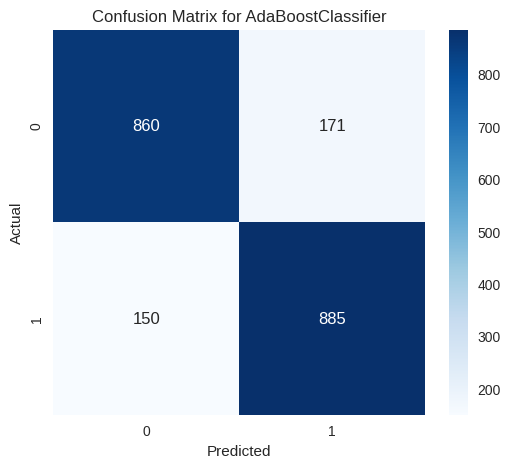

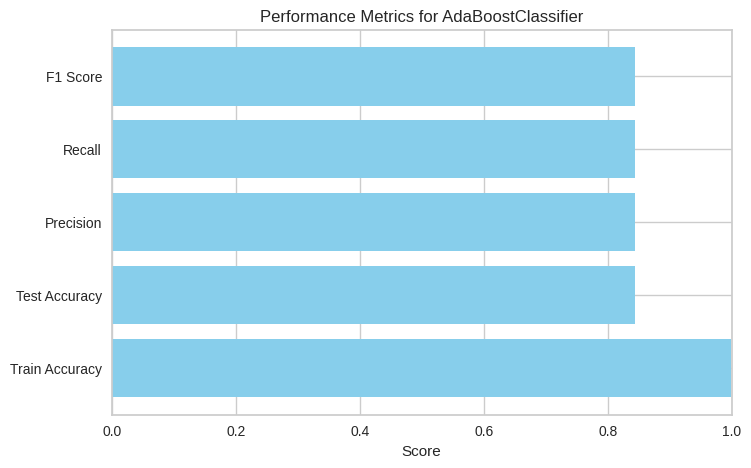

(0.998547215496368,
 0.8446272991287512,
 0.8447636768154067,
 0.8446272991287512,
 0.8446081857713353)

In [296]:
# Define the decision tree with desired parameters
dt = DecisionTreeClassifier()

# Create the AdaBoost classifier with the base estimator
ada_model = AdaBoostClassifier(estimator=dt)
param_dist = {
    'n_estimators': [500,800],  
    'learning_rate': [0.01,0.1],  
    'algorithm': ['SAMME.R'], 
    'estimator__max_depth': [9],  
    'estimator__max_features': ['log2'],  
    'estimator__criterion': ['entropy'],
    'estimator__class_weight': ['balanced'],
}
parameter_finder_classification(ada_model, param_dist)

In [300]:
import joblib
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the model with the best parameters
dt = DecisionTreeClassifier(max_depth=9,criterion='entropy',max_features='log2',class_weight='balanced')
ada_model = AdaBoostClassifier(estimator=dt, n_estimators=500,
                               learning_rate=0.01, algorithm='SAMME.R')

# Train the model
ada_model.fit(X_train, y_train)

# Save the model using joblib
joblib.dump(ada_model, 'churn_adaboost.joblib')

# Load the saved model (for future use)
loaded_model = joblib.load('churn_adaboost.joblib')

# Make predictions with the loaded model
y_pred = loaded_model.predict(X_test)

# Display the result
print(f"Accuracy on the test set: {accuracy_score(y_test, y_pred):.2%}")


Accuracy on the test set: 84.41%
